In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm, pearsonr

import os
import time
import itertools

from glove.model3 import *

/home/jcthompson5@ad.wisc.edu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# import file names
files = os.listdir("data/SET3_Thirdtrial/")
files

['CDanc_CDmono12h_PROVIDET0.csv', 'CDevo_CDmono12h_PROVIDET0.csv']

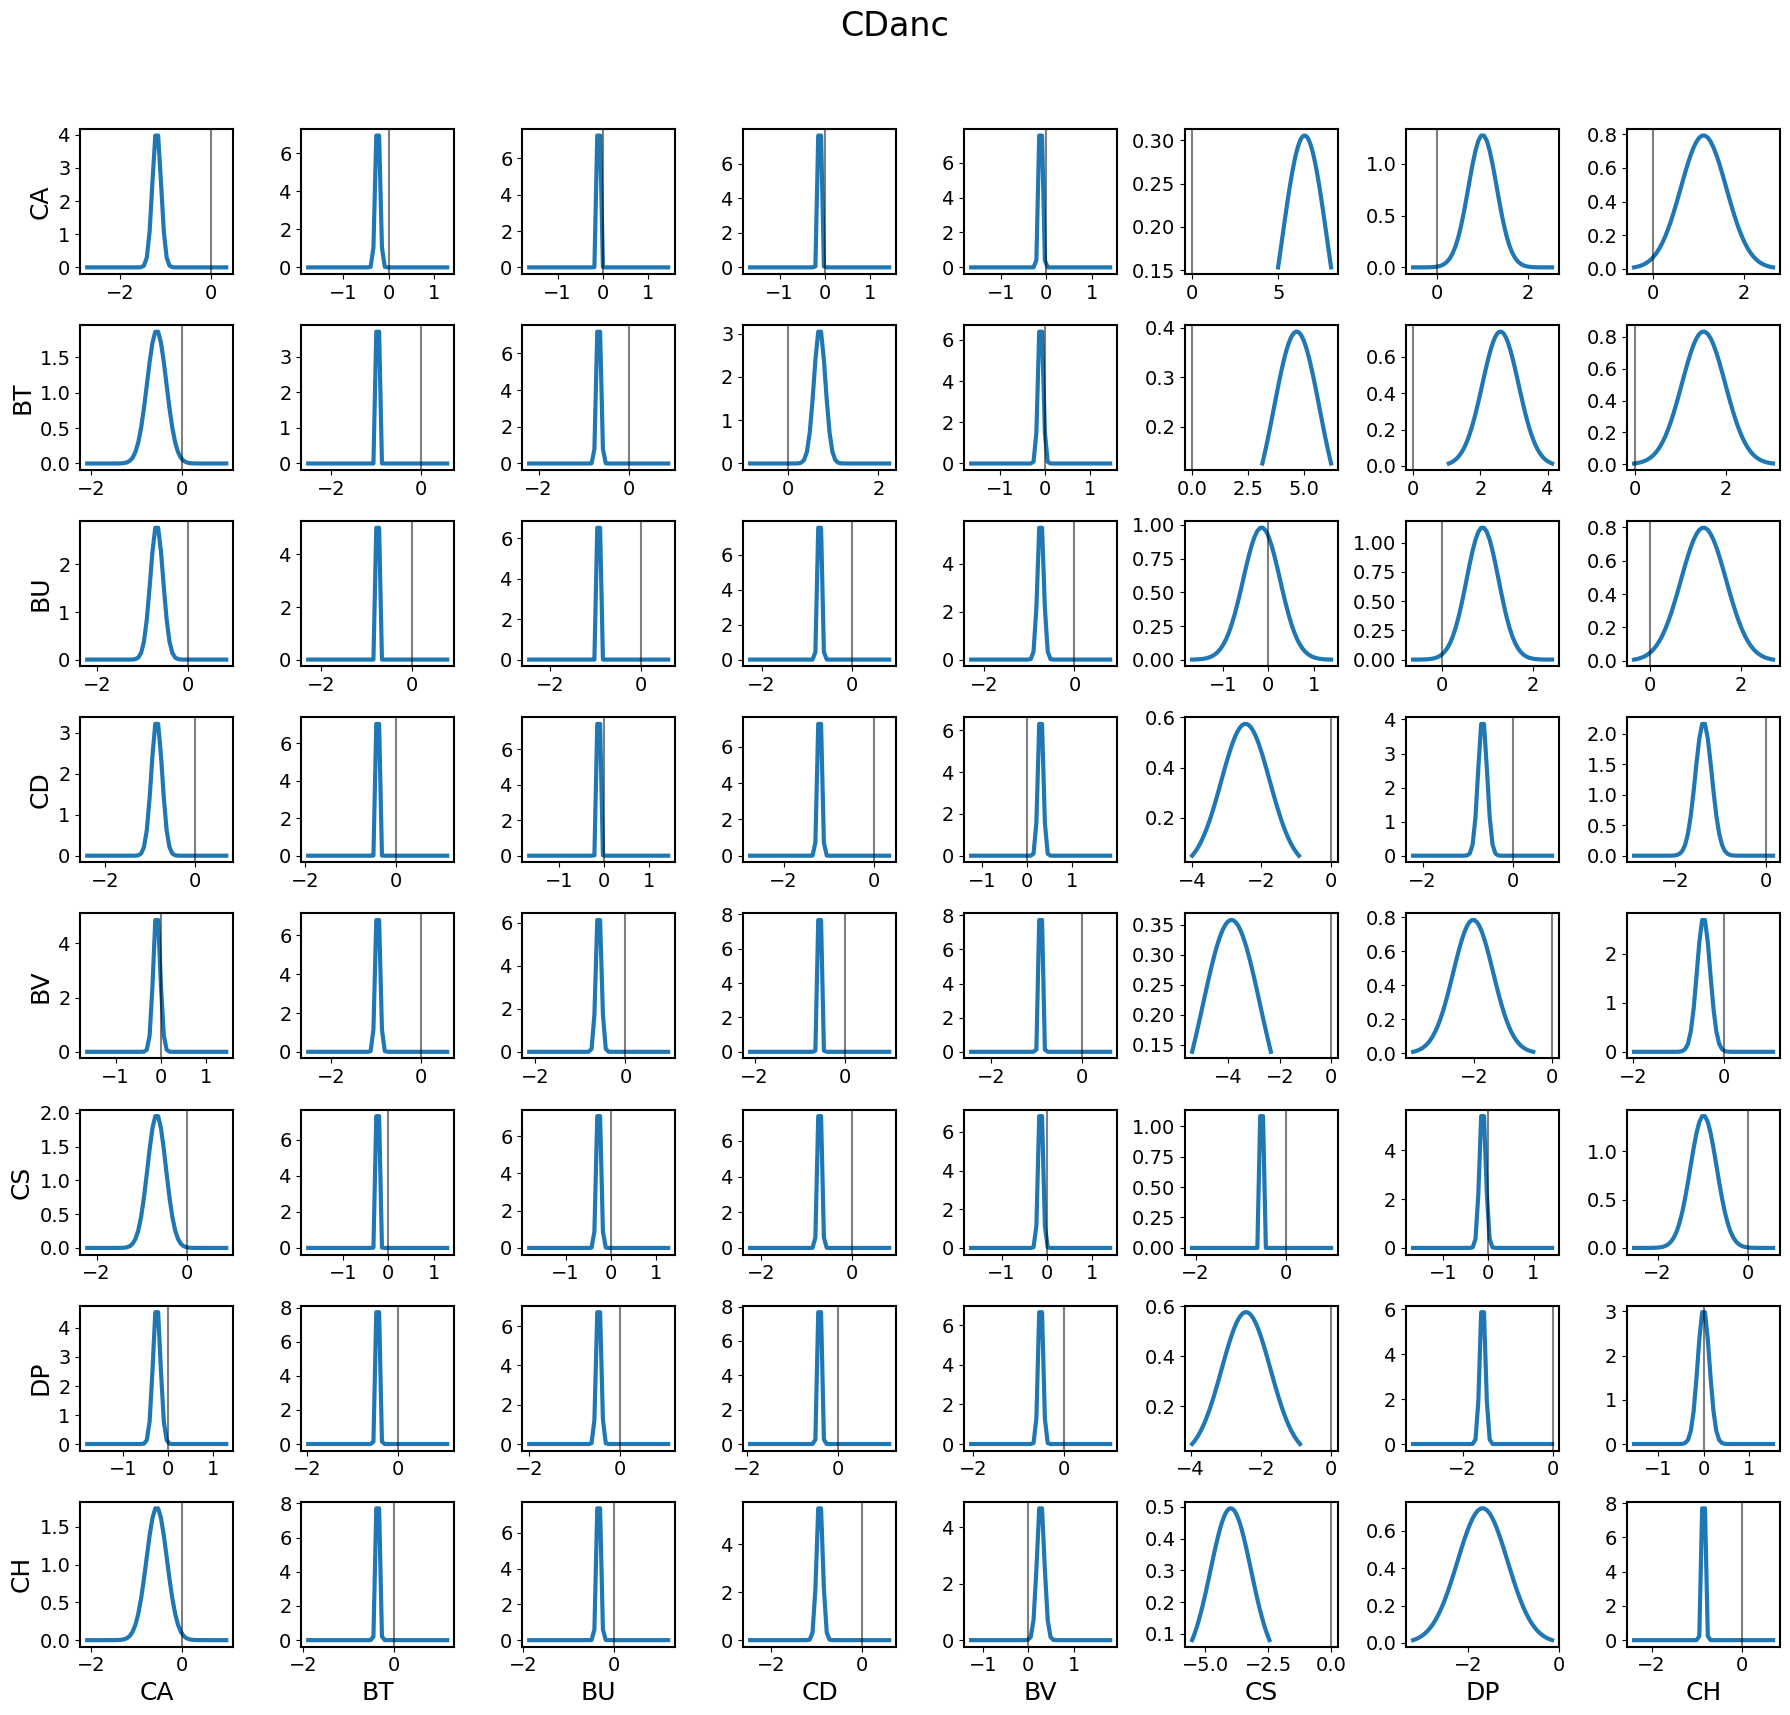

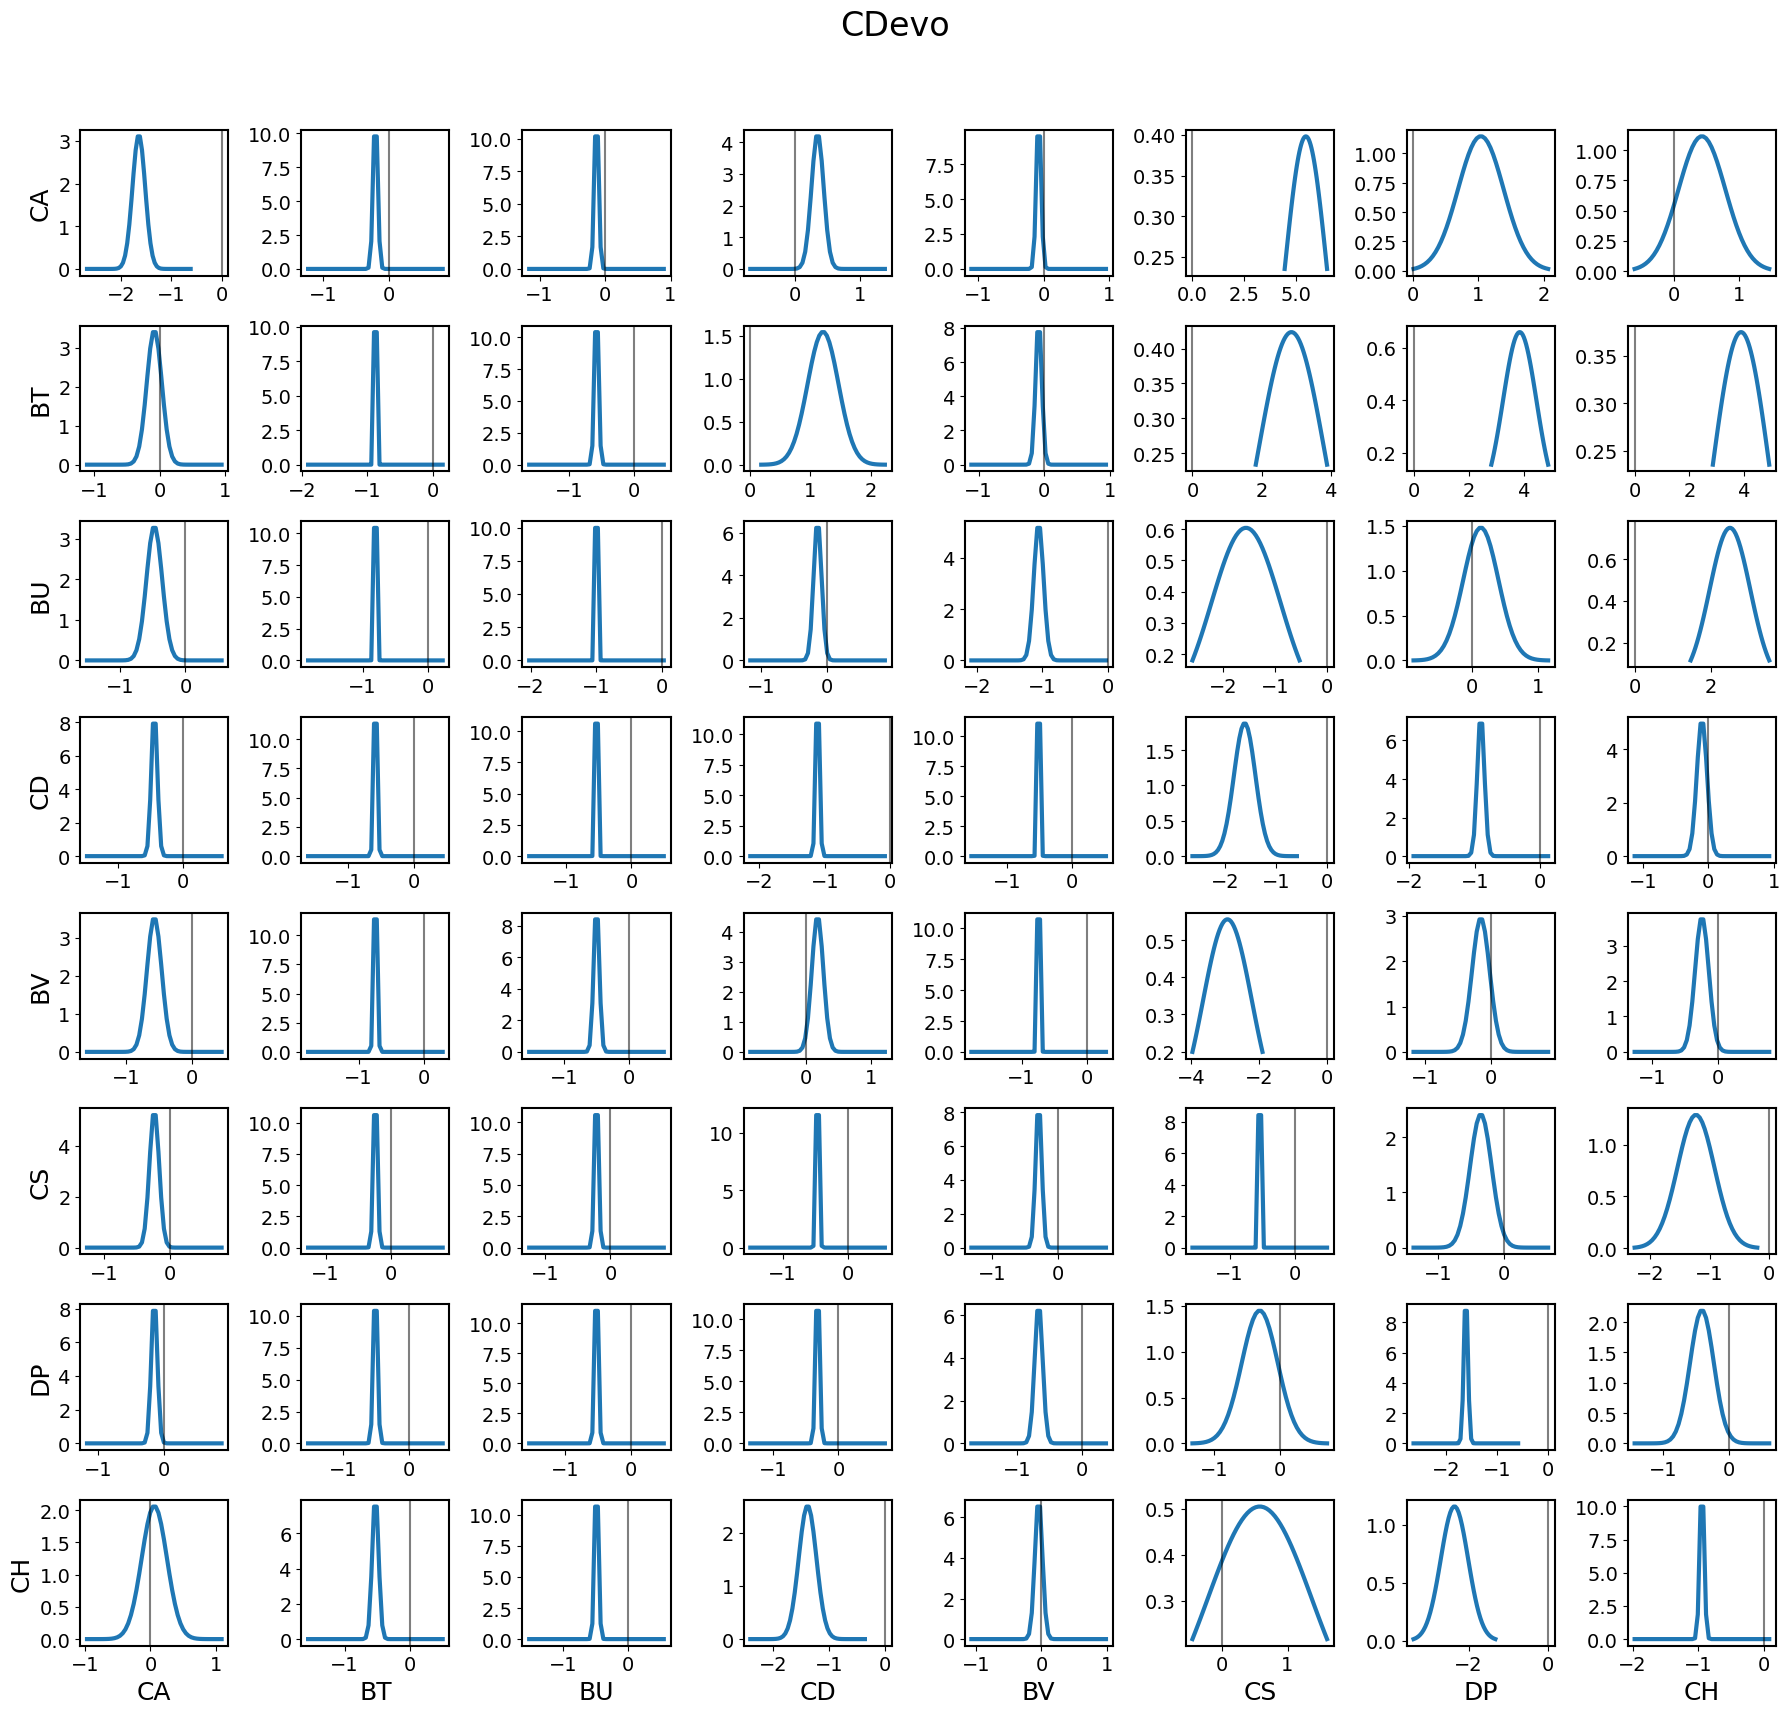

In [3]:
params = {'axes.linewidth': 1.5}
plt.rcParams.update(params)

exp_names = []
for file in files:
    # define strain name
    strain = file.split("_")[0]
    
    # import data
    df = pd.read_csv(f"data/SET3_Thirdtrial/{file}")
    df.sort_values(by=["Treatments", "Time"], inplace=True)
    
    # make sure that conditions have at least one measurement
    dfs = []
    for treatment, df_t in df.groupby("Treatments"):
        if df_t.shape[0] > 1:
            dfs.append(df_t)
    df = pd.concat(dfs)

    # determine species names 
    species = df.columns.values[2:]

    # save to df 
    param_df = pd.read_csv("params/SET3/"+strain+"_3.csv")
    
    # list of parameter names 
    param_names = []
    for s1 in species:
        for s2 in species:
            param_names += [s1+"*"+s2]
    param_names = list(species) + param_names
    
    # plot parameter distribution
    n_species = len(species)
    Avec = param_df["Param value"].values[n_species:]
    Aij_std = param_df["Param stdv"].values[n_species:]

    plt.figure(figsize=(18,18))
    # set counter for parameter std. 
    k = 0

    for i in range(n_species):
        for j in range(n_species):
            plt.subplot(n_species, n_species, k+1)
            a = np.linspace(Avec[k]-np.std(Avec), Avec[k]+np.std(Avec))
            plt.plot(a, norm.pdf(a,Avec[k],Aij_std[k]), linewidth=3)
            plt.axvline(x=0, c='k', alpha=.5)
            k += 1
            if j == 0:
                plt.ylabel(species[i], fontsize=18)
            if i == n_species-1:
                plt.xlabel(species[j], fontsize=18)

            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            
    plt.suptitle(strain, fontsize=24)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig("params/SET3/"+strain+"_3.pdf")
    plt.show()